# SHAP Heatmamps in time


## Import libraries and data

In [1]:
import sys
sys.path.append('..')
import re

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils.load_data import load_dataset
import shap
import seaborn as sns
root_path="C://Users//noemi//Desktop//university//university//tesi/Thesis-XAI/"

In [17]:
with open(root_path+"data_shap/y_test_ordered_150.pkl", 'rb') as f:
    y_test_ascending = pickle.load(f)
with open(root_path+"data_shap/X_test_ordered_150.pkl", 'rb') as f:
    X_test = pickle.load(f)
with open(root_path+"data_shap/y_test_sess_2.pkl", 'rb') as f:
    y_test_sess_2 = pickle.load(f)


In case it's the first time we open a new file we need to change it in a pd Dataframe. use this code

    for patient in range(11):
        for i in range (1,11):
            X_test[patient] = X_test[patient].drop(["SE{}".format(i), "CCI_{}".format(i), "CCII_{}".format(i),"CCIII_{}".format(i), "CCIV_{}".format(i), "SKEW{}".format(i), "MAV{}".format(i), "WL{}".format(i), "IEMG{}".format(i), "HP_A{}".format(i)], axis=1)
    shap_extratrees_bg=[]
    for patient in range(num_pat):
        file_path = root_path+'resources/results_ordered/SHAP_no_correlated_features/shap_XRT_ordered_patient_{}_background_data.pkl'.format(patient)
        with open(file_path, 'rb') as f:
            shap_values = pickle.load(f)
        shap_extratrees_bg.append(shap_values)
        shap_list=[] 
        for i in range(len(shap_values)):
            shap_df = pd.DataFrame(data=shap_values[i], columns=X_test[i].columns.values)
            shap_list.append(shap_df)
        with open(
            root_path+'/resources/results_ordered/SHAP_no_correlated_features/shap_XRT_ordered_patient_{}_background_data.pkl'.format(patient),
            'wb') as f:
            pickle.dump(shap_list, f)

### INDEXES for separate shap values

To separate SHAP values we need to know where the label changes. so we create a list of 11 elements each of one it include the indexes of that specific matrix where the label is changing

In [7]:
indexes=[]
for patient in range(11):
    index=[0]
    for i in range(len(y_test_ascending[patient])-1):
        if y_test_ascending[patient][i]!=y_test_ascending[patient][i+1]:
            index.append(i+1)
    index.append(len(y_test_ascending[patient])) 
    indexes.append(index)

In [35]:
feature=shap_values_XRT_ordered[0][0].columns.values.copy()
channel=shap_values_XRT_ordered[0][0].columns.values.copy()
for index in range(len(feature)):
    feature[index]=''.join([i for i in feature[index] if not i.isdigit()])
    channel[index]=''.join([i for i in channel[index] if i.isdigit()])
print(feature)
print(channel)
num_features=len(feature)

['MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'ZC' 'ZC'
 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'SSC' 'SSC' 'SSC' 'SSC' 'SSC'
 'SSC' 'SSC' 'SSC' 'SSC' 'SSC' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL'
 'WL' 'WL' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A'
 'HP_A' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M'
 'HP_M' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C'
 'HP_C' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'IEMG'
 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8'
 '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4'
 '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10']


# XRT

In [33]:
#file_path = root_path+ "resources/SHAP/SHAP_EXTRA/shap_XRT_all_bk_ascending_indexed.pkl"
#with open(file_path, 'rb') as f:
#    shap_values_XRT_ordered = pickle.load(f)
num_pat=11
shap_values_XRT_ordered=[]

for patient in range(num_pat):
    file_path = root_path+'resources/results_ordered/SHAP_XRT/shap_XRT_ordered_patient_{}_background_data.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_list=[] 
    shap_values_XRT_ordered.append(shap_values)

### DROP USELESS FEATURES SSC AND HPC


In [ ]:
print(shap_values_XRT_ordered[0][5][y_test_ascending[0]==6])

#for patient in range(11):
#    for cls in range (8):
#        for i in range(1, 11):
#            shap_values_XRT_ordered[patient][cls] = shap_values_XRT_ordered[patient][cls].drop(["SSC{}".format(i), "HP_C{}".format(i)], axis=1)#

            #shap_values_XRT_ordered[patient][cls] = shap_values_XRT_ordered[patient][cls].drop(["SSC{}".format(i), "HP_C{}".format(i)], axis=1)

### SHAP VALUES

for each patient, **8 different shap value matrices** have been computed (separately for each class), but for each class have been considered both the element of the same class and element from a different class.


In order to limit the dimension of the pltos, for each class have been selected *only* instances of that specific class, divided by round (in each round it is supposed to be 2 movements but we don't know when to separate)
then, the abs value is computed and all values are normalized for the maximum.


we obtain 8 plots of 2 different round with the importance of each feature over time


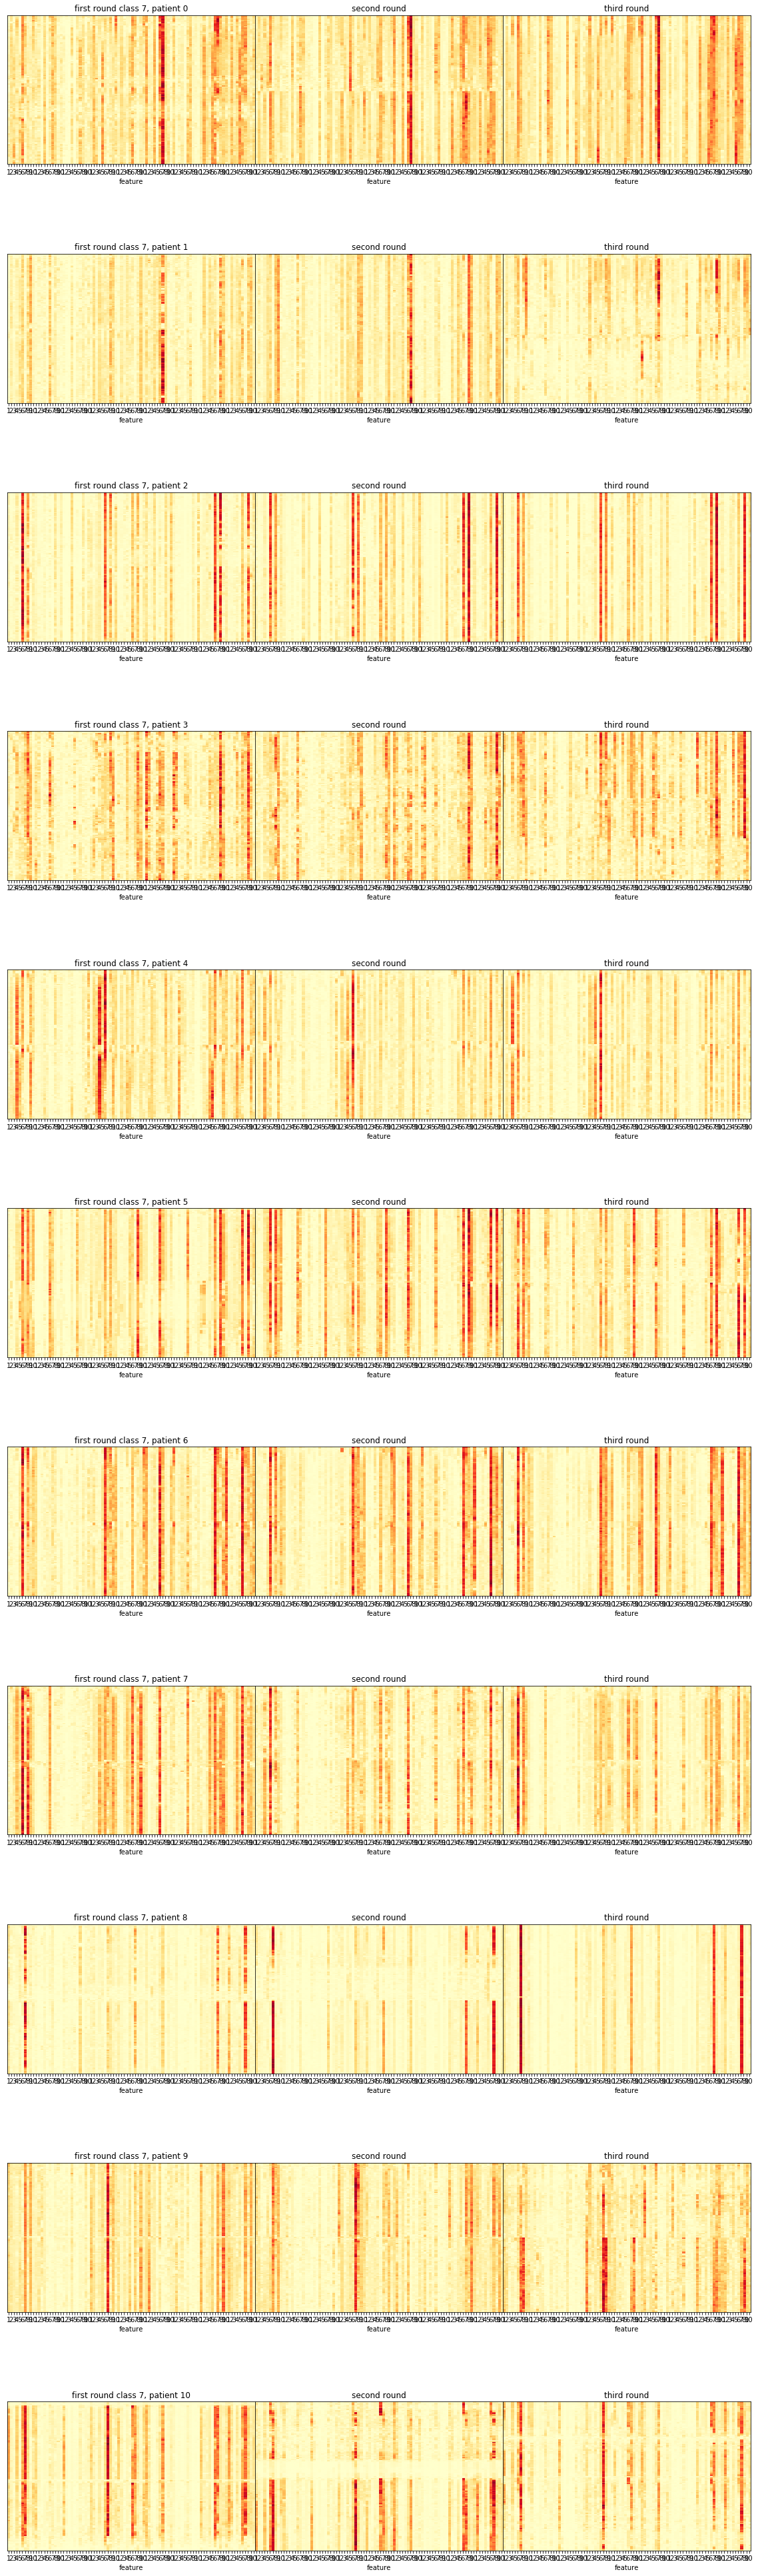

In [43]:
#patient=0
heigth=11;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(20, 70))
f.subplots_adjust(hspace=0.6, wspace=0)
#i=0 #class
for i in range(8):
    for patient in range(11):

        value=(shap_values_XRT_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,0].set(xlabel='feature')
        axes[patient,0].set(title="first round class {}, patient {}".format(i, patient))
        axes[patient,0].set_xticks(list(range(0,num_features)))
        axes[patient,0].set_yticks([])
        axes[patient,0].set_xticklabels(channel)

        value=(shap_values_XRT_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,1].set(xlabel='feature')
        axes[patient,1].set(title="second round")
        axes[patient,1].set_xticks(list(range(0,num_features)))
        axes[patient,1].set_yticks([])
        axes[patient,1].set_xticklabels(channel)

        value=(shap_values_XRT_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,2].set(xlabel='feature')
        axes[patient,2].set(title="third round")
        axes[patient,2].set_xticks(list(range(0,num_features)))
        axes[patient,2].set_yticks([])
        axes[patient,2].set_xticklabels(channel)

    plt.savefig(root_path+"/resources/results_ordered/SHAP_matrices/class_{}_XRT_ordered.svg".format(i))

# XRT in different session

In [ ]:
shap_values_XRT_sess_1=[]
shap_values_XRT_sess_2=[]

for patient in range(6,8):
    file_path = root_path+'resources/results_ordered/SHAP_XRT/shap_XRT_ordered_patient_{}_sess_2.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_values_XRT_sess_2.append(shap_values)

In [24]:
indexes_sess_2=[]
for patient in range(2):
    index=[0]
    for i in range(len(y_test_sess_2[patient])-1):
        if y_test_sess_2[patient][i]!=y_test_sess_2[patient][i+1]:
            index.append(i+1)
    index.append(len(y_test_sess_2[patient])) 
    indexes_sess_2.append(index)


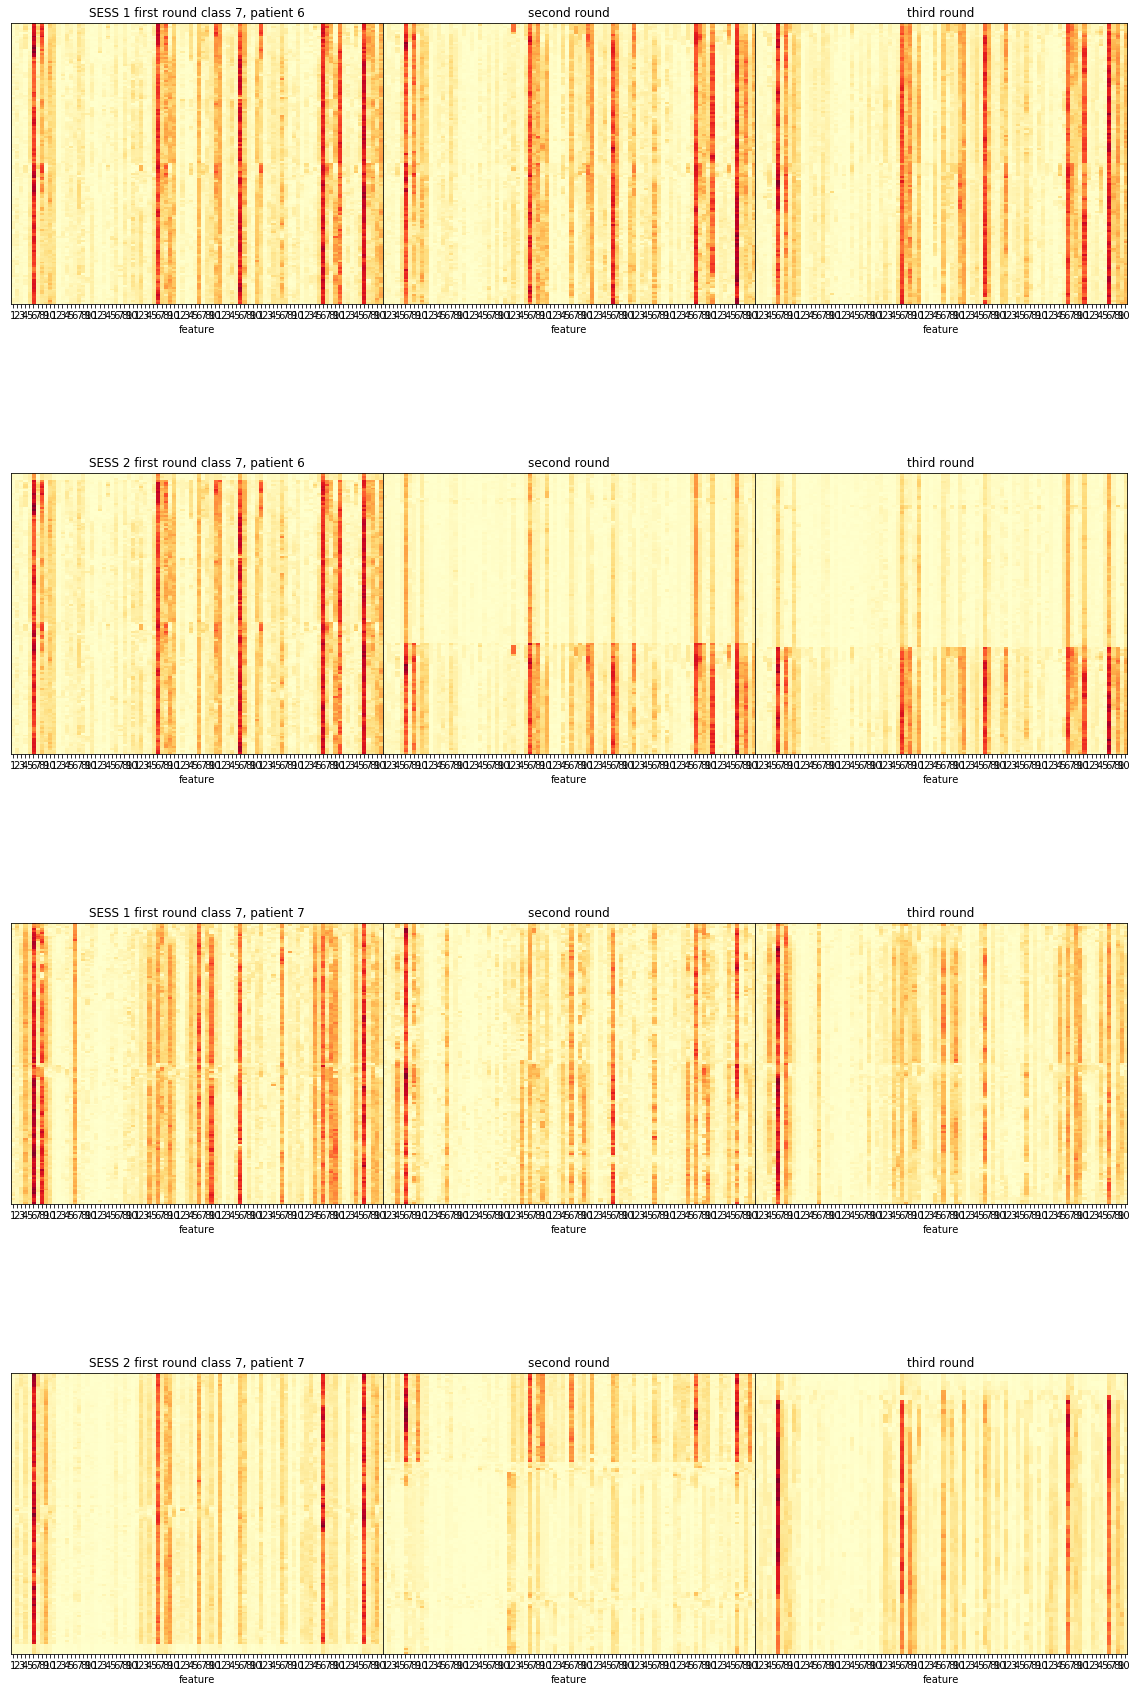

In [28]:
heigth=4;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(20, 30))
f.subplots_adjust(hspace=0.6, wspace=0)
#i=0 #class

for i in range(8):
    for patient in range(2):

        value=(shap_values_XRT_ordered[patient+6][i][indexes[patient+6][i]:indexes[patient+6][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,0].set(xlabel='feature')
        axes[patient*2,0].set(title="SESS 1 first round class {}, patient {}".format(i, patient+6))
        axes[patient*2,0].set_xticks(list(range(0,num_features)))
        axes[patient*2,0].set_yticks([])
        axes[patient*2,0].set_xticklabels(channel)

        value=(shap_values_XRT_ordered[patient+6][i][indexes[patient+6][i+8]:indexes[patient+6][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,1].set(xlabel='feature')
        axes[patient*2,1].set(title="second round")
        axes[patient*2,1].set_xticks(list(range(0,num_features)))
        axes[patient*2,1].set_yticks([])
        axes[patient*2,1].set_xticklabels(channel)

        value=(shap_values_XRT_ordered[patient+6][i][indexes[patient+6][i+16]:indexes[patient+6][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,2].set(xlabel='feature')
        axes[patient*2,2].set(title="third round")
        axes[patient*2,2].set_xticks(list(range(0,num_features)))
        axes[patient*2,2].set_yticks([])
        axes[patient*2,2].set_xticklabels(channel)

        value=(shap_values_XRT_sess_2[patient][i][indexes_sess_2[patient][i]:indexes_sess_2[patient][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,0].set(xlabel='feature')
        axes[patient*2+1,0].set(title="SESS 2 first round class {}, patient {}".format(i, patient+6))
        axes[patient*2+1,0].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,0].set_yticks([])
        axes[patient*2+1,0].set_xticklabels(channel)

        value=(shap_values_XRT_sess_2[patient][i][indexes_sess_2[patient][i+8]:indexes_sess_2[patient][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,1].set(xlabel='feature')
        axes[patient*2+1,1].set(title="second round")
        axes[patient*2+1,1].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,1].set_yticks([])
        axes[patient*2+1,1].set_xticklabels(channel)

        value=(shap_values_XRT_sess_2[patient][i][indexes_sess_2[patient][i+16]:indexes_sess_2[patient][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,2].set(xlabel='feature')
        axes[patient*2+1,2].set(title="third round")
        axes[patient*2+1,2].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,2].set_yticks([])
        axes[patient*2+1,2].set_xticklabels(channel)
    plt.savefig(root_path+"/resources/results_ordered/SHAP_matrices/class_{}_XRT_ordered_sess12.svg".format(i))

## LDA

In [44]:
#file_path = root_path+ "resources/class_{}_XRT_ordered.svg".format(i).pkl"
#with open(file_path, 'rb') as f:
#    shap_values_LDA_ordered = pickle.load(f)

shap_values_LDA_ordered=[]

for patient in range(num_pat):
    file_path = root_path+'resources/results_ordered/SHAP_LDA/shap_LDA_ordered_patient_{}_1600.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_values_LDA_ordered.append(shap_values)

In [30]:
shap_values_LDA_ordered[patient][i].columns

Index(['MAV1', 'MAV2', 'MAV3', 'MAV4', 'MAV5', 'MAV6', 'MAV7', 'MAV8', 'MAV9',
       'MAV10', 'ZC1', 'ZC2', 'ZC3', 'ZC4', 'ZC5', 'ZC6', 'ZC7', 'ZC8', 'ZC9',
       'ZC10', 'SSC1', 'SSC2', 'SSC3', 'SSC4', 'SSC5', 'SSC6', 'SSC7', 'SSC8',
       'SSC9', 'SSC10', 'WL1', 'WL2', 'WL3', 'WL4', 'WL5', 'WL6', 'WL7', 'WL8',
       'WL9', 'WL10', 'HP_A1', 'HP_A2', 'HP_A3', 'HP_A4', 'HP_A5', 'HP_A6',
       'HP_A7', 'HP_A8', 'HP_A9', 'HP_A10', 'HP_M1', 'HP_M2', 'HP_M3', 'HP_M4',
       'HP_M5', 'HP_M6', 'HP_M7', 'HP_M8', 'HP_M9', 'HP_M10', 'HP_C1', 'HP_C2',
       'HP_C3', 'HP_C4', 'HP_C5', 'HP_C6', 'HP_C7', 'HP_C8', 'HP_C9', 'HP_C10',
       'RMS1', 'RMS2', 'RMS3', 'RMS4', 'RMS5', 'RMS6', 'RMS7', 'RMS8', 'RMS9',
       'RMS10', 'IEMG1', 'IEMG2', 'IEMG3', 'IEMG4', 'IEMG5', 'IEMG6', 'IEMG7',
       'IEMG8', 'IEMG9', 'IEMG10'],
      dtype='object')

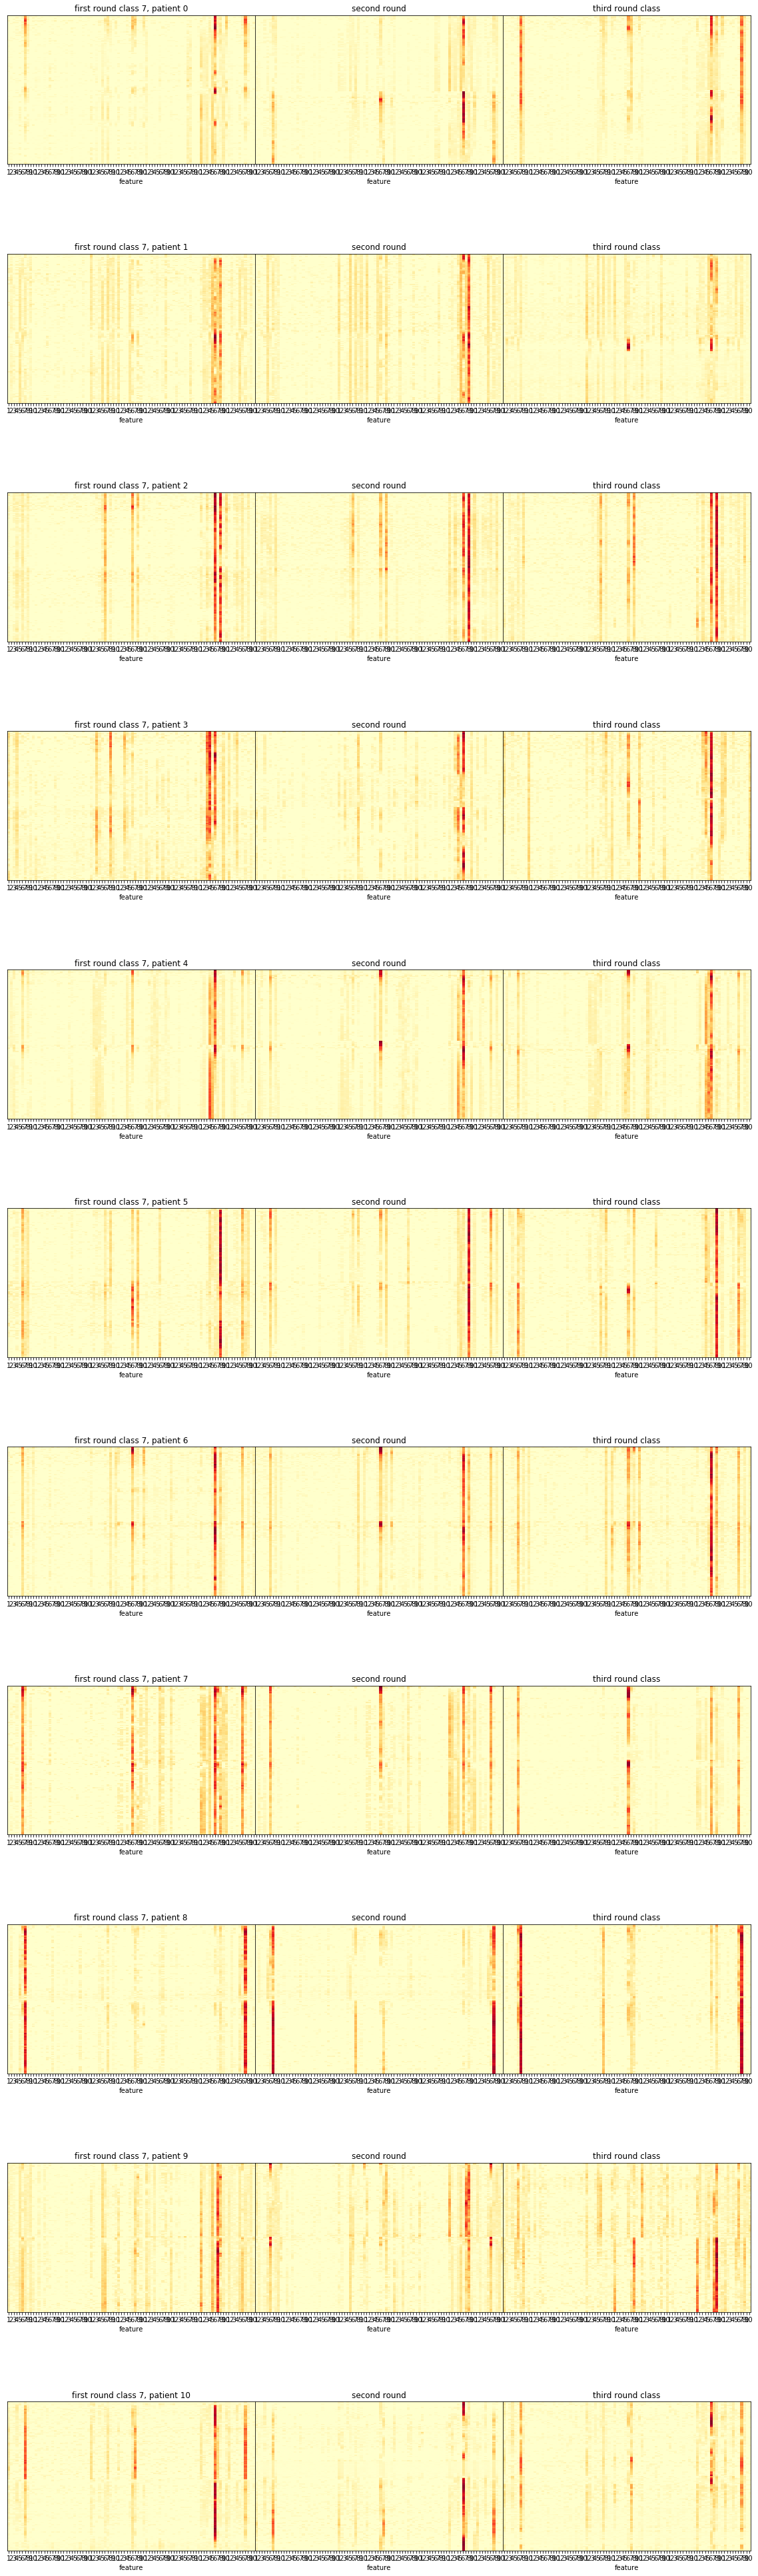

In [38]:
#patient=0
heigth=11;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(20, 70))
f.subplots_adjust(hspace=0.6, wspace=0)
i=0#class
for i in range (8):
    for patient in range(11):

        value=(shap_values_LDA_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,0].set(xlabel='feature')
        axes[patient,0].set(title="first round class {}, patient {}".format(i, patient))
        axes[patient,0].set_xticks(list(range(0,90)))
        axes[patient,0].set_yticks([])
        axes[patient,0].set_xticklabels(channel)

        value=(shap_values_LDA_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,1].set(xlabel='feature')
        axes[patient,1].set(title="second round")
        axes[patient,1].set_xticks(list(range(0,90)))
        axes[patient,1].set_yticks([])
        axes[patient,1].set_xticklabels(channel)

        value=(shap_values_LDA_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,2].set(xlabel='feature')
        axes[patient,2].set(title="third round class")
        axes[patient,2].set_xticks(list(range(0,90)))
        axes[patient,2].set_yticks([])
        axes[patient,2].set_xticklabels(channel)

    plt.savefig(root_path+"resources/results_ordered/SHAP_matrices/class_{}_LDA_ordered.svg".format(i))


## LDA in different session

In [42]:
shap_values_LDA_sess_2=[]

for patient in range(6,8):
    file_path = root_path+'resources/results_ordered/SHAP_LDA/shap_LDA_ordered_patient_{}_sess_2.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_values_LDA_sess_2.append(shap_values)
indexes_sess_2=[]
for patient in range(2):
    index=[0]
    for i in range(len(y_test_sess_2[patient])-1):
        if y_test_sess_2[patient][i]!=y_test_sess_2[patient][i+1]:
            index.append(i+1)
    index.append(len(y_test_sess_2[patient])) 
    indexes_sess_2.append(index)

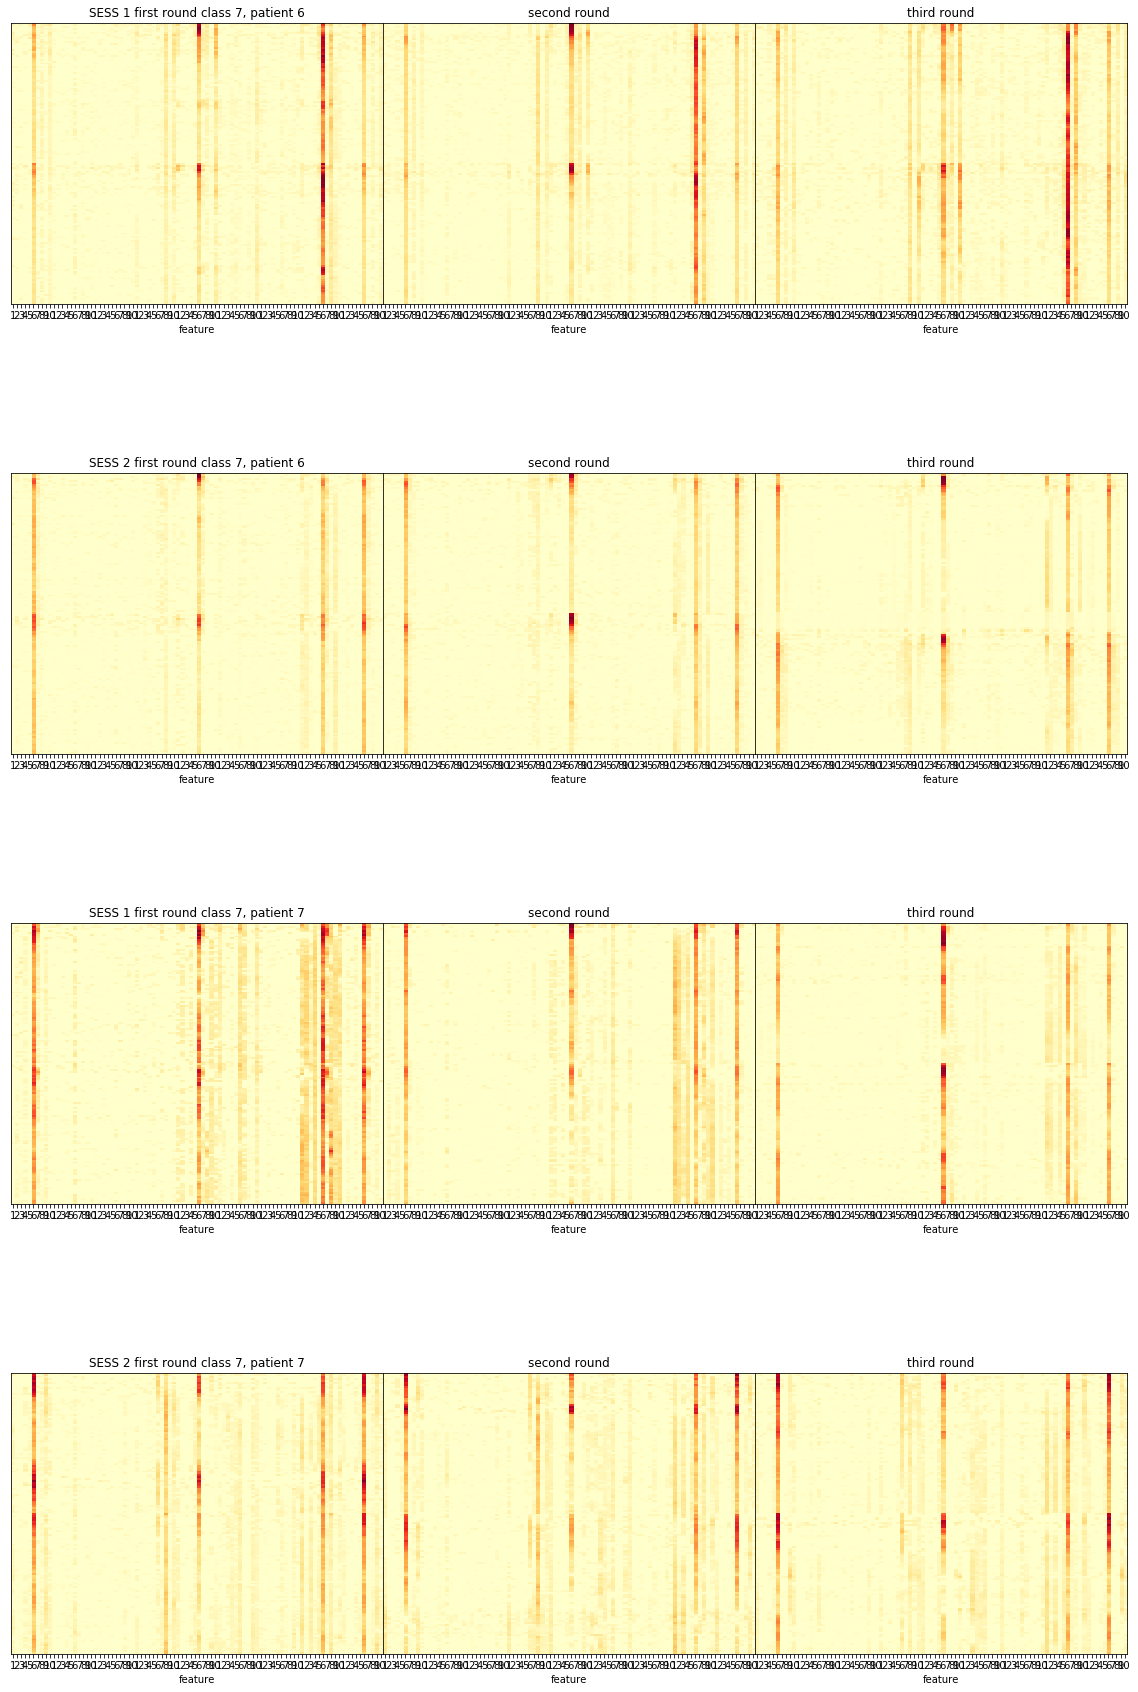

In [45]:
heigth=4;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(20, 30))
f.subplots_adjust(hspace=0.6, wspace=0)
#i=0 #class

for i in range(8):
    for patient in range(2):

        value=(shap_values_LDA_ordered[patient+6][i][indexes[patient+6][i]:indexes[patient+6][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,0].set(xlabel='feature')
        axes[patient*2,0].set(title="SESS 1 first round class {}, patient {}".format(i, patient+6))
        axes[patient*2,0].set_xticks(list(range(0,num_features)))
        axes[patient*2,0].set_yticks([])
        axes[patient*2,0].set_xticklabels(channel)

        value=(shap_values_LDA_ordered[patient+6][i][indexes[patient+6][i+8]:indexes[patient+6][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,1].set(xlabel='feature')
        axes[patient*2,1].set(title="second round")
        axes[patient*2,1].set_xticks(list(range(0,num_features)))
        axes[patient*2,1].set_yticks([])
        axes[patient*2,1].set_xticklabels(channel)

        value=(shap_values_LDA_ordered[patient+6][i][indexes[patient+6][i+16]:indexes[patient+6][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,2].set(xlabel='feature')
        axes[patient*2,2].set(title="third round")
        axes[patient*2,2].set_xticks(list(range(0,num_features)))
        axes[patient*2,2].set_yticks([])
        axes[patient*2,2].set_xticklabels(channel)

        value=(shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i]:indexes_sess_2[patient][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,0].set(xlabel='feature')
        axes[patient*2+1,0].set(title="SESS 2 first round class {}, patient {}".format(i, patient+6))
        axes[patient*2+1,0].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,0].set_yticks([])
        axes[patient*2+1,0].set_xticklabels(channel)

        value=(shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i+8]:indexes_sess_2[patient][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,1].set(xlabel='feature')
        axes[patient*2+1,1].set(title="second round")
        axes[patient*2+1,1].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,1].set_yticks([])
        axes[patient*2+1,1].set_xticklabels(channel)

        value=(shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i+16]:indexes_sess_2[patient][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,2].set(xlabel='feature')
        axes[patient*2+1,2].set(title="third round")
        axes[patient*2+1,2].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,2].set_yticks([])
        axes[patient*2+1,2].set_xticklabels(channel)
    plt.savefig(root_path+"/resources/results_ordered/SHAP_matrices/class_{}_XRT_ordered_sess12.svg".format(i))

# SVM

In [19]:
#file_path = root_path+ "resources/class_{}_XRT_ordered.svg".format(i).pkl"
#with open(file_path, 'rb') as f:
#    shap_values_LDA_ordered = pickle.load(f)

shap_values_SVM_ordered=[]

for patient in range(num_pat):
    file_path = root_path+'resources/results_ordered/SHAP_no_correlated_features/SHAP_SVM_{}.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_values_SVM_ordered.append(shap_values)
feature=shap_values_SVM_ordered[0][0].columns.values.copy()
channel=shap_values_SVM_ordered[0][0].columns.values.copy()
for index in range(len(feature)):
    feature[index]=''.join([i for i in feature[index] if not i.isdigit()])
    channel[index]=''.join([i for i in channel[index] if i.isdigit()])
print(feature)
print(channel)
num_features=len(feature)

['ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'SSC' 'SSC' 'SSC' 'SSC'
 'SSC' 'SSC' 'SSC' 'SSC' 'SSC' 'SSC' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M'
 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C'
 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS'
 'RMS' 'RMS' 'RMS' 'RMS']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8'
 '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10']


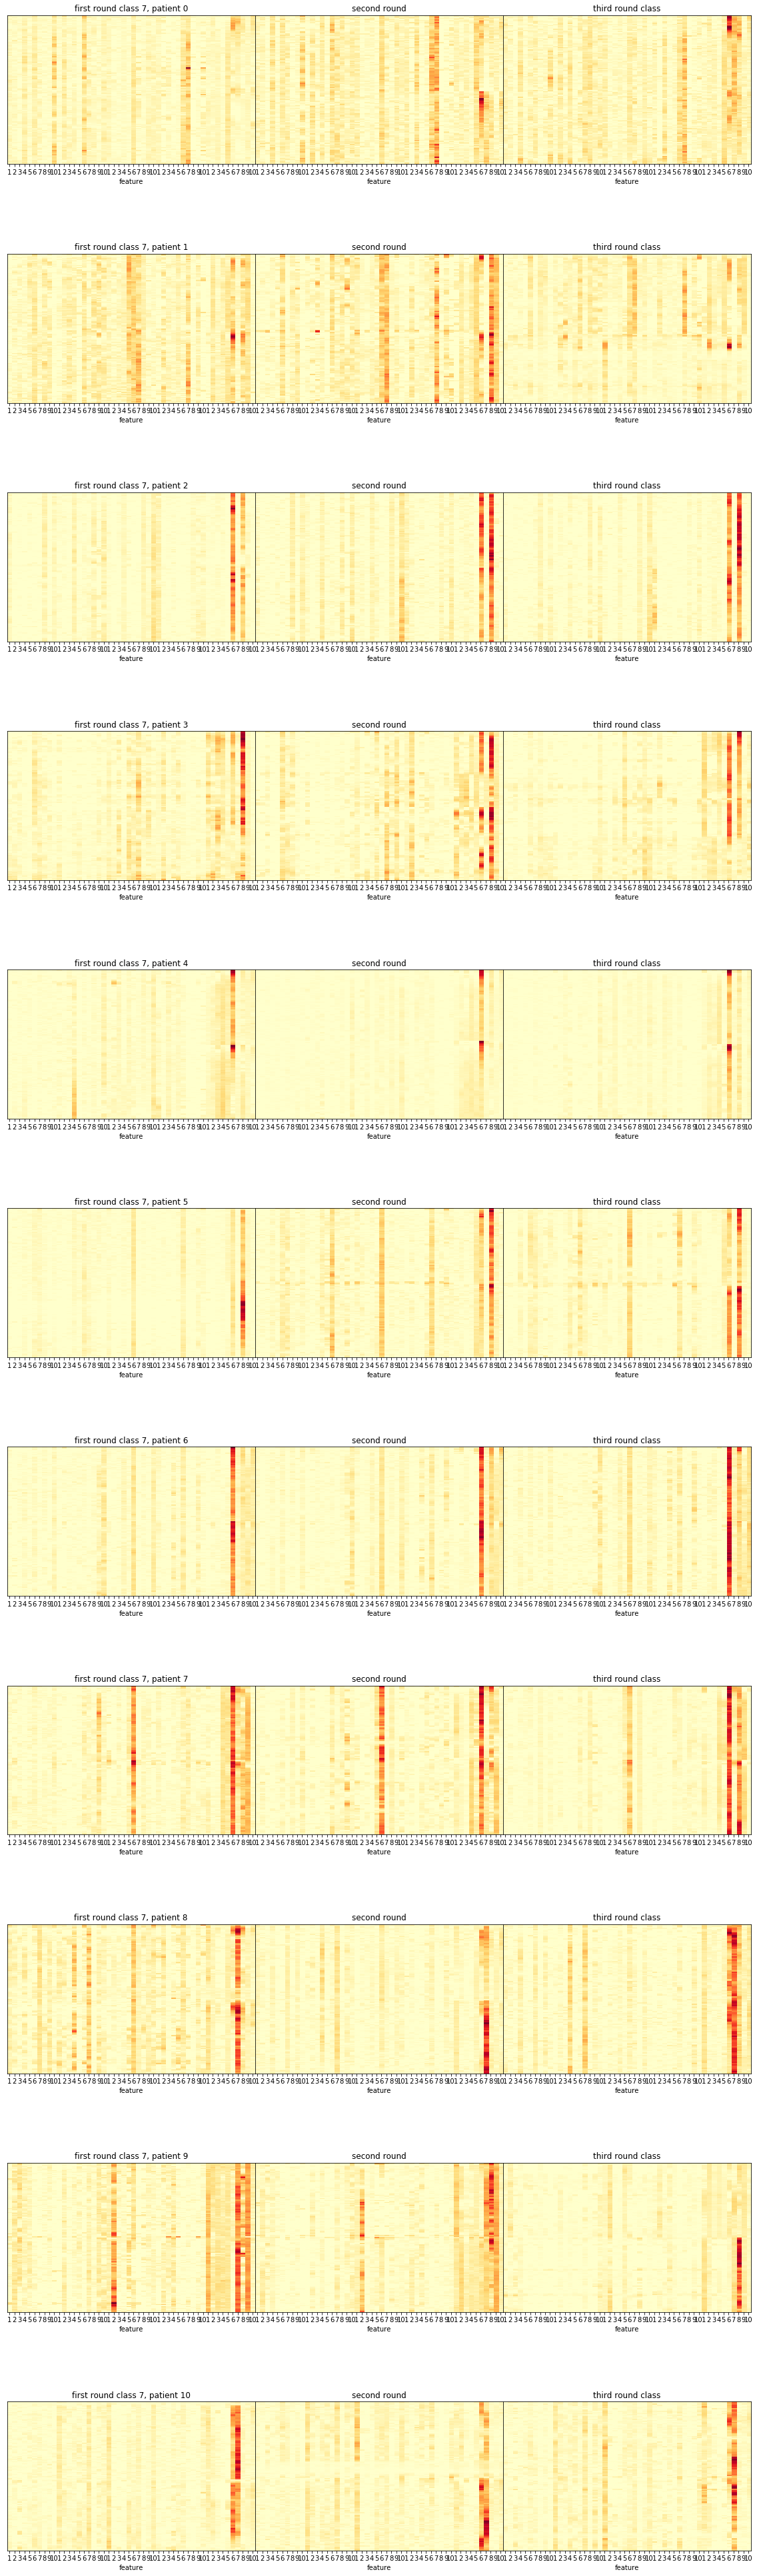

In [22]:
#patient=0
heigth=11;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(20, 70))
f.subplots_adjust(hspace=0.6, wspace=0)
i=0#class
for i in range (8):
    for patient in range(11):

        value=(shap_values_SVM_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,0].set(xlabel='feature')
        axes[patient,0].set(title="first round class {}, patient {}".format(i, patient))
        axes[patient,0].set_xticks(list(range(0,num_features)))
        axes[patient,0].set_yticks([])
        axes[patient,0].set_xticklabels(channel)

        value=(shap_values_SVM_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,1].set(xlabel='feature')
        axes[patient,1].set(title="second round")
        axes[patient,1].set_xticks(list(range(0,num_features)))
        axes[patient,1].set_yticks([])
        axes[patient,1].set_xticklabels(channel)

        value=(shap_values_SVM_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,2].set(xlabel='feature')
        axes[patient,2].set(title="third round class")
        axes[patient,2].set_xticks(list(range(0,num_features)))
        axes[patient,2].set_yticks([])
        axes[patient,2].set_xticklabels(channel)

    plt.savefig(root_path+"resources/results_ordered/SHAP_matrices/class_{}_SVM_ordered_NOCORR.svg".format(i))

    

In [62]:
from scipy import stats
i=0
print("Statistical test comparing Round of the same patient averaged over time")
for i in range(8):
    for patient in range(11):

        value_r1=np.mean((shap_values_SVM_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs()), axis=0)

        value_r2=np.mean((shap_values_SVM_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs()), axis=0)

        value_r3=np.mean((shap_values_SVM_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs()), axis=0)

        p_val=stats.f_oneway(value_r1, value_r2, value_r3)
        print("class:{}, Patient:{}, statistical test:{}".format(i, patient,p_val))

Statistical test comparing Round of the same patient averaged over time
class:0, Patient:0, statistical test:F_onewayResult(statistic=0.036822208090793805, pvalue=0.9638563716554119)
class:0, Patient:1, statistical test:F_onewayResult(statistic=0.0665914411329362, pvalue=0.9356055678224594)
class:0, Patient:2, statistical test:F_onewayResult(statistic=0.014232236264841611, pvalue=0.9858699215313773)
class:0, Patient:3, statistical test:F_onewayResult(statistic=0.002407714622948986, pvalue=0.9975952209373059)
class:0, Patient:4, statistical test:F_onewayResult(statistic=0.09187084741660717, pvalue=0.912275292603292)
class:0, Patient:5, statistical test:F_onewayResult(statistic=0.08166395571739363, pvalue=0.9216233786205058)
class:0, Patient:6, statistical test:F_onewayResult(statistic=2.709195832083498, pvalue=0.06991608014783963)
class:0, Patient:7, statistical test:F_onewayResult(statistic=0.4856206881975234, pvalue=0.6162987487133611)
class:0, Patient:8, statistical test:F_onewayResu

In [61]:


for patient in range(11):
    for i in range(8):
        
        value_r1=(shap_values_SVM_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
        
        tmp=list(value_r1.iloc[time,:] for time in range(len(value_r1)))
        stat,p_val_r1=stats.f_oneway(*tmp)
        
        value_r2=(shap_values_SVM_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
        tmp=list(value_r2.iloc[time,:] for time in range(len(value_r2)))
        stat,p_val_r2=stats.f_oneway(*tmp)
        
        value_r3=(shap_values_SVM_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        tmp=list(value_r3.iloc[time,:] for time in range(len(value_r3)))
        stat,p_val_r3=stats.f_oneway(*tmp)
        
        print("Patient:{}, class:{} statistical test r1: {}, r2: {} r3: {}".format(patient, i,p_val_r1, p_val_r2, p_val_r3))

Patient:0, class:0 statistical test r1: 0.9999999997523557, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:0, class:1 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:0, class:2 statistical test r1: 0.9999999691513477, r2: 0.9429915703801967 r3: 0.9999999999999999
Patient:0, class:3 statistical test r1: 0.9999999999999999, r2: 0.9999996208485044 r3: 0.9999999999999999
Patient:0, class:4 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.9999948306724475
Patient:0, class:5 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.05985712361059822
Patient:0, class:6 statistical test r1: 4.165552895131448e-59, r2: 9.991095345496034e-11 r3: 1.103770893133803e-10
Patient:0, class:7 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:1, class:0 statistical test r1: 0.9809607682793581, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:1, class:1 statistical test 

Patient:9, class:5 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:9, class:6 statistical test r1: 0.9999999999999999, r2: 0.9994410164800929 r3: 0.9999999999999999
Patient:9, class:7 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:10, class:0 statistical test r1: 1.1046847611026127e-07, r2: 0.0206415914510351 r3: 0.9999999999999999
Patient:10, class:1 statistical test r1: 0.9999990849471734, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:10, class:2 statistical test r1: 0.9999999999999999, r2: 0.9999766928883379 r3: 0.9992693567581812
Patient:10, class:3 statistical test r1: 0.9999999930302615, r2: 0.9999999999989804 r3: 0.05842725239946055
Patient:10, class:4 statistical test r1: 0.9999999999999999, r2: 0.9982458712399488 r3: 0.9998163378284586
Patient:10, class:5 statistical test r1: 0.9999999959081489, r2: 0.9999999980837992 r3: 0.9999233369049615
Patient:10, class:6 statistical tes